<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 1번
#### 1.1 탐색적 데이터 분석 수행(시각화 포함)
#### 1.2 이상치 처리(이상값 대체방안 제시)
#### 1.3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

In [1]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/data1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# 결측 확인
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


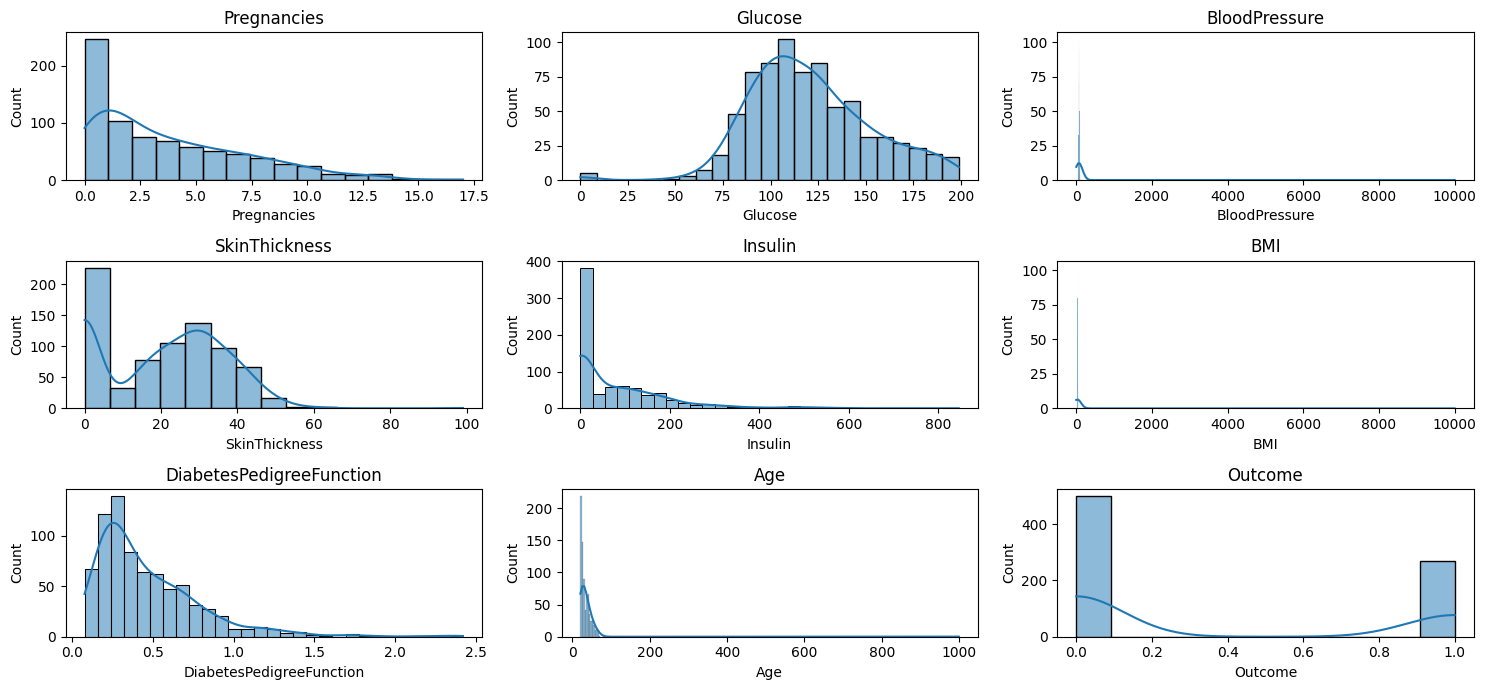

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00,0.901674,0.159220
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00,0.173754,0.640780
BloodPressure,768.0,81.976562,358.835058,0.000,62.00000,72.0000,80.00000,9999.00,27.592196,763.551413
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00,0.109372,-0.520072
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00,2.272251,7.214260
BMI,768.0,44.934766,359.739733,0.000,27.30000,32.0000,36.60000,9999.00,27.693107,767.271192
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,1.919911,5.594954
Age,768.0,34.447917,36.754727,21.000,24.00000,29.0000,41.00000,999.00,23.650609,620.256035
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00,0.635017,-1.600930


In [14]:
# 1) EDA

cols = df.columns.tolist()

fig, axes = plt.subplots(3,3 , figsize = (15, 7))

for i, axes in enumerate(axes.flat[:len(cols)]) :
  col_i = df[cols].columns[i]
  sns.histplot(df[col_i], kde= True, ax = axes)
  axes.set_title(col_i)



plt.tight_layout()
plt.show()

desc = df.describe().T  # 기존 describe 결과 (행/열 변환)

# 왜도와 첨도 추가
desc["Skewness"] = df.skew()
desc["Kurtosis"] = df.kurtosis()

display(desc)

print("""
EDA 수행 결과
75%와 max 값의 차이가 많이 나는 BloodPRessure, BMI, AGE 데이터인 결과 극단적인 이상치가 존재하는 것으로 보여, 이상치 제거가 필요해보임
Insuline, DiabetsPedigreeFunction 은 오른쪽으로 치우친 분포로 왜도가 큰 분포를 가지고 있기 때문에, 로그 변환 혹은 Box-Cox 변환이 필요해보임

""")

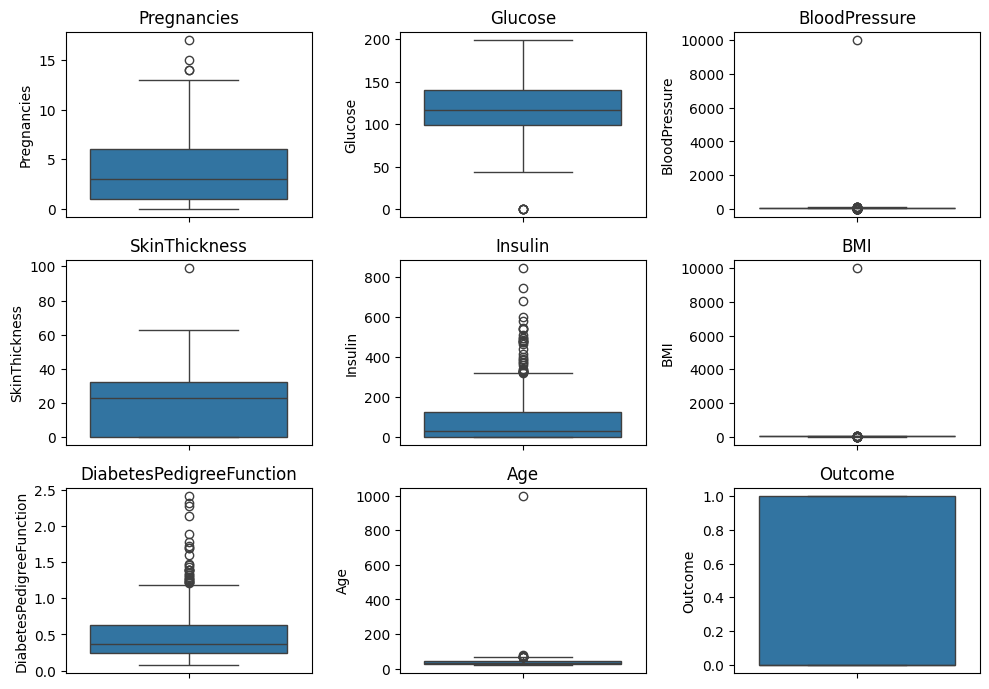

In [19]:
# 이상치 점검
cols = df.columns.tolist()

fig, axes = plt.subplots(3,3 , figsize = (10, 7))

for i, axes in enumerate(axes.flat[:len(cols)]) :
  col_i = df[cols].columns[i]
  sns.boxplot(df[col_i], ax = axes)
  axes.set_title(col_i)

plt.tight_layout()
plt.show()


<Axes: >

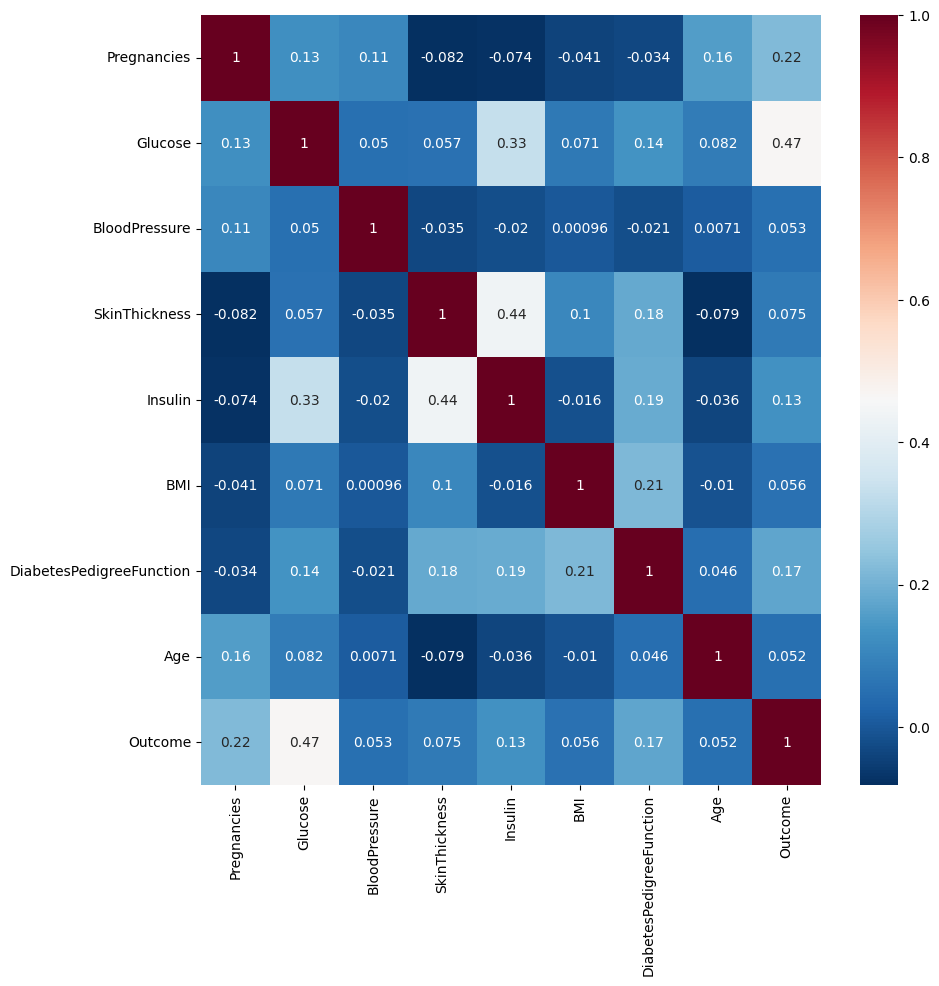

In [22]:
# 연속적인 변수의 다중 공선성이 존재하는지 확인하기 위해 상관 관계 검정

cor_mat = df.corr(method ='pearson')
plt.figure(figsize = (10, 10))

sns.heatmap(cor_mat, cmap = 'RdBu_r', annot = True)

#### 1.2 이상치 처리 (대체 방안 제시)


In [ ]:
print("""
이상치 판단 여부를 판단할 때에는 아래 4개의 방법이 있다.
1) EDS : 평균 -/+ 3 * 표준편차 를 벗어남
2) 기하평균 -/+ 2.5 표준편차를 벗어남
3) IQR : Q1 - 1.5 * IQR < x < Q3 - 1.5 * IQR
4) 군집 분석을 통한 이상치 진단

이상치를 처리하는 방법으로는 다음과 같다.
1) 절단 : 경계값 너무의 이상치들을 제거하는 방법
2) 조정 : 이상치 진단 기준에 의해 정해진 상한과 하한건 값으로 조정한다. 절단과는 달리 소실이 없기 때문에 이상치 전후의 데이터 크키가 동일
3) 클리핑 : 상한값과 하한값을 특정 값으로 지정해서 해당 점위를 벗어나는 값을 상한/하한값으로 조정하는 방법이다.
4) 대체 : 이상치를 제거하는 대신, 평균, 중앙값, 최빈값 또는 회귀 모델을 사용하여 대체하며, KNN-Imputation, Regression Imputation이 있다
5) 로그 변환 : 데이터의 분포를 정규 분포에 가깝게 변형하여 이상치를 완화하는 방법

데이터의 특성을 볼때, 극단적인 오류값(예: 9999, -999, 10000)가 있는 컬럼들은 명백한 데이터 오류인 가능성이 보이고,
Insuline, DiabetsPedigreeFunction은 IQR를 벗어난 값이 많아 보이기 때문에, 상한/하한 기준 설정 후 조정이 필요한 IQR 기반
이상치 제거로 처리한다.

""")

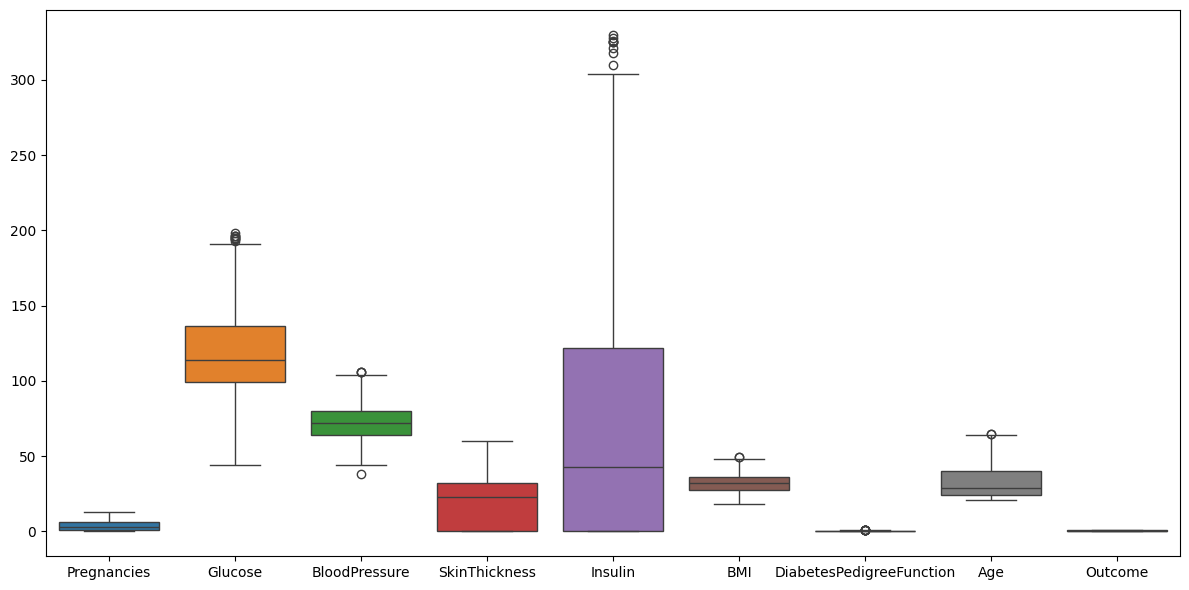

In [31]:
# 이상치 직접 제거 (BloodPressure/ BMI / Age)
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',  'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

def remove_outlier(df) :
  df_cleaned = df.copy()
  for x in cols :
    q1 = df_cleaned[x].quantile(0.25)
    q3 = df_cleaned[x].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr


    df_cleaned = df_cleaned[(df_cleaned[x] >= lower) & (df_cleaned[x] <= upper)]

  return df_cleaned.reset_index(drop = True)


after_iqr = remove_outlier(df)

plt.figure(figsize=(12, 6))
sns.boxplot(after_iqr)
plt.tight_layout()


#### 1.3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

In [32]:
print("""
IQR 를 통해 상한/하한을 적용하여 이상치 제거를 한 결과 극단적이 값들은 사라졌다.
하지만 아직 Glucose, Insuline 과 같은 컬럼은 이상치 제거 후의 극단적인 값들이 존재하는 것으로 보여진다.
이는 실제 컬럼 값이 적절한 값인지 도메인 전문가와 논의가 필요해보인다.
""")


IQR 를 통해 상한/하한을 적용하여 이상치 제거를 한 결과 극단적이 값들은 사라졌다. 
하지만 아직 Glucose, Insuline 과 같은 컬럼은 이상치 제거 후의 극단적인 값들이 존재하는 것으로 보여진다. 
이는 실제 컬럼 값이 적절한 값인지 도메인 전문가와 논의가 필요해보인다. 



✅ 1번 문제 데이터 참고하여

    🔎 2.1 오버샘플링 과정 설명하고 결과 작성
    🔎 2.2 언더샘플링 과정 설명하고 결과 작성
    🔎 2.3 둘 중 하나를 선택하고 이유 설명

#### 📌오버 샘플링
     오버 샘플링은 소수 클래스의 데이터를 늘려, 균형을 맞추는 기법

     오버 샘플링 종류
     1. 랜덤 오버 샘플링 : 소수 클래스를 단순 복제
     2. SMOTE : KNN를 사용해 가상의 데이터를 생성/ 단순 복제가 아니기 때문에 과적합 방지
     3. ADASYN : SMOTE와 유사하지만, 가까운 샘플이 적은 데이터에 초첨을 맞춤

#### 📌언더 샘플링
     언더 샘플링은 다수의 클래스를 줄여 소수 클래스와, 균형을 맞추는 기법

     오버 샘플링 종류
     1. 랜덤 오버 샘플링 : 다수 클래스를 무작위로 제거
     2. Tomek Links : 두 클래스의 가장 가까운 샘플 쌍을 제거
     3. NearMiss : 다수 클래스 중 소수 클래스와 가장 가까운 샘플만 남김

In [40]:
# 이상치 제거 데이터 복사
df2 = after_iqr.copy()


X = df.drop(columns = ['Outcome'], axis = 1)
y = df['Outcome']

print(y.value_counts())

# 1) Over Samping
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over = RandomOverSampler()
over_x, over_y = over.fit_resample(X, y)

print("Over Sampling 결과")
print(Counter(over_y))


# 2) Under Samping
from imblearn.under_sampling  import RandomUnderSampler

under = RandomUnderSampler(random_state = 42)
under_x , under_y = under.fit_resample(X, y)

print("under Sampling 결과")
print(Counter(under_y))


print("""
언더 샘플링 사용시, 268개의 데이터를 사용하기 때문에 데이터 손실이 크다.
데이터가 많을 수록 모델이 패턴을 학습할 수 있기 때문에 오버 샘플링을 선택한다.
""")

Outcome
0    500
1    268
Name: count, dtype: int64
Over Sampling 결과
Counter({1: 500, 0: 500})
under Sampling 결과
Counter({0: 268, 1: 268})

언더 샘플링 사용시, 268개의 데이터를 사용하기 때문에 데이터 손실이 크다.
데이터가 많을 수록 모델이 패턴을 학습할 수 있기 때문에 오버 샘플링을 선택한다. 



✅ 3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

1) Logistic 장점

    * 해석의 용이성
    * 빠른 연산 속도
    * 정규화 기법 -> L1, L2, 규제를 사용하여 과적합 방지 가능

2) 랜덤 포레스트 (Random Forest)

    * 여러 개의 의사결정나무을 앙상블 방식으로 결합 / 다수결 방식으로 최종 분류 결정
    * 과적합 방지 : 여러 트리 조합으로 일반화 성능 우수
    * 변수 중요도 평가 가능

3) SVM

    * 고차원 데이터에서 성능 우수
    * 데이터가 적을떄 과적합 없이 학습 가능
    * 커널 트릭을 사용하여 복잡한 패턴도 학습 가능


✅ 3-2 모델 비교하고 결과 설명

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import time

over_x, over_y

# Data Scacling 준비
ss = StandardScaler()
scaled_x = pd.DataFrame(ss.fit_transform(over_x) , columns = over_x.columns)

# scaled_x, over_y
final_x = scaled_x.copy()
final_y = over_y.copy()


X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size = 0.3, random_state = 42)


models = {
    'LR' : LogisticRegression() ,
    'RF' : RandomForestClassifier(),
    'SVM' : SVC()

}


res = []
for name, model in models.items() :
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()

  pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  res.append([name, (end_time - start_time), accuracy, f1])

result = pd.DataFrame(res, columns = ['Models','Time','Accuracy_score', 'F1_score'])
print(result)

print("""
로지스틱, 랜덤 포레스트, SVM 에 대한 모델 평가를 위해 아래 3가지의 지표를 선택함
Accuracy_Score : 데이터 중 올바르게 분류된 비율
F1-score: 정밀도 재현율을 균형있게 반영하는 지표
TIME : 모델의 학습 및 예측 속도

정확도와 F1_Score가 가장 높은 랜덤 포레스트 모델을 선택한다.
""")

  Models      Time  Accuracy_score  F1_score
0     LR  0.015006        0.786667  0.790850
1     RF  1.047541        0.830000  0.838095
2    SVM  0.091799        0.780000  0.793750

로지스틱, 랜덤 포레스트, SVM 에 대한 모델 평가를 위해 아래 3가지의 지표를 선택함
Accuracy_Score : 데이터 중 올바르게 분류된 비율 
F1-score: 정밀도 재현율을 균형있게 반영하는 지표
TIME : 모델의 학습 및 예측 속도 

정확도와 F1_Score가 가장 높은 랜덤 포레스트 모델을 선택한다.



✅  3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
Ratio,21.844924,16.057278,13.803510,12.455654,10.767682,10.142267,9.488598,5.440087
Cumsum,21.844924,37.902202,51.705712,64.161366,74.929049,85.071315,94.559913,100.000000


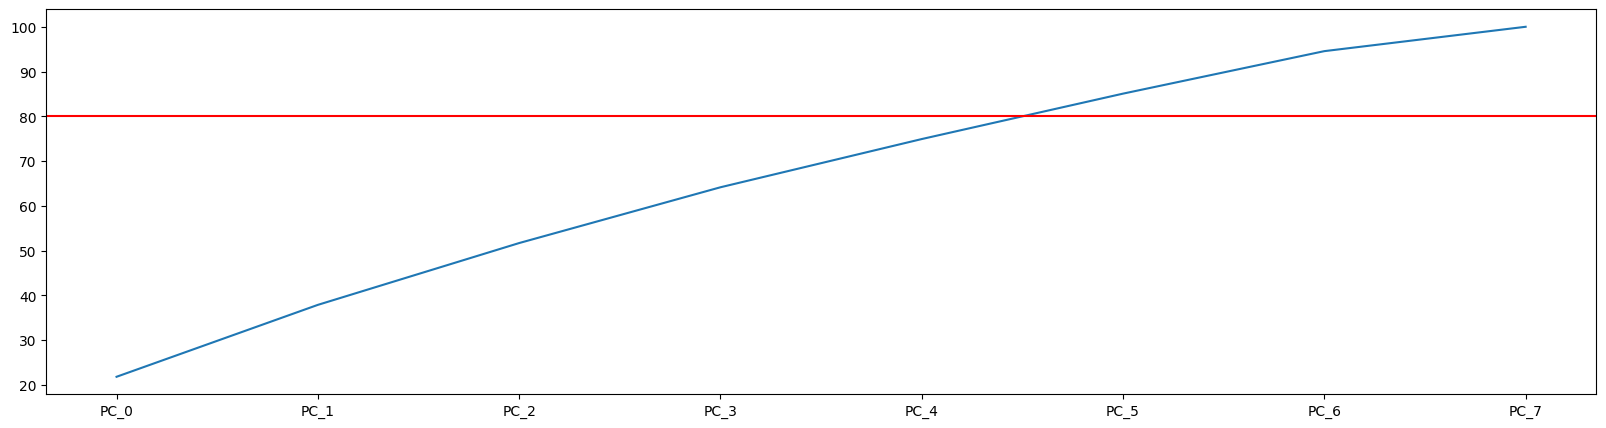

In [58]:
from sklearn.decomposition import PCA

#  final_x
pca = PCA()
pca.fit(final_x )


pca_df = pd.DataFrame({
    'Ratio' : pca.explained_variance_ratio_ * 100,
    'Cumsum' : pca.explained_variance_ratio_.cumsum() * 100

})

pca_df.index = ['PC_' + str(x) for x in range(len(pca_df.index))]
display(pca_df.T)

plt.figure(figsize = (20, 5))
plt.plot(pca_df['Cumsum'])
plt.axhline(80, color = 'r')

print("""
PC_5 가 전체 분산의 80%이상을 설명하기 때문에 5개의 주성분을 선택한다.
""")


In [63]:

# PCA_5 개
pca = PCA(n_components= 5)
pca_5_final_x = pca.fit_transform(final_x )

pca_5_final_x = pd.DataFrame(pca_5_final_x, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5'])

# 데이터 재구성
pca_x = pca_5_final_x.copy()
pca_y = final_y.copy()


X_train, X_test, y_train, y_test = train_test_split(pca_x, pca_y, test_size = 0.3, random_state = 42)


models = {
    'LR' : LogisticRegression() ,
    'RF' : RandomForestClassifier(),
    'SVM' : SVC()

}


res = []
for name, model in models.items() :
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()

  pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  res.append([name, (end_time - start_time), accuracy, f1])

pca_result = pd.DataFrame(res, columns = ['Models','Time','Accuracy_score', 'F1_score'])
print("PCA 차원 축소 전")
print(result)
print("")
print("PCA 차원 축소 후")
print(pca_result)



PCA 차원 축소 전
  Models      Time  Accuracy_score  F1_score
0     LR  0.015006        0.786667  0.790850
1     RF  1.047541        0.830000  0.838095
2    SVM  0.091799        0.780000  0.793750

PCA 차원 축소 후
  Models      Time  Accuracy_score  F1_score
0     LR  0.006856        0.793333  0.797386
1     RF  0.545711        0.810000  0.815534
2    SVM  0.027533        0.750000  0.773414


#### ✅문제 4
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

In [77]:
import pandas as pd
import scipy.stats as stats

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
df.head()

print("""
귀무 가설 : 금속 재질 함유량의 분산이 1.3이다.
대립 가설 : 금속 재질 함유량의 분산이 1.3가 아니다.

""")

alpha = 0.5
target_var =1.3

sample_var = np.var(df['content'], ddof = 1)
n = len(df['content'])

# 카이제곱 통계량
chi2_stat = (n-1) * sample_var / target_var
p_val = 1 - stats.chi2.cdf(chi2_stat, df = n - 1)

if p_val < alpha:
        print("❌ 귀무가설 기각: 불량 가능성 있음!\n")
else:
        print("✅ 귀무가설 채택: 허용 범위 내 분산\n")


귀무 가설 : 금속 재질 함유량의 분산이 1.3이다. 
대립 가설 : 금속 재질 함유량의 분산이 1.3가 아니다. 


❌ 귀무가설 기각: 불량 가능성 있음!



In [74]:
import numpy as np
from scipy.stats import chi2 # 양측 검정이라 2인가

def var_test(x, va0, direction = 'two-tailed', alpha = 0.05):
    # x : df
    # va0 : 비교하고자 하는 값으로 여기서는 1.3
    # alpha : 유의수준
    n = len(x)
    Q = (n-1) * np.var(x) / va0
    print("direction : ", direction)
    if direction  == 'lower':
        q = chi2.ppf(alpha, n-1)
        if Q <= q:
            return "귀무가설 기각"
        else:
            return "귀무가설 채택"
    elif direction  == 'upper':
        q = chi2.ppf(1-alpha, n-1)
        if Q >= q:
            return "귀무가설 기각"
        else:
            return "귀무가설 채택"
    else:
        q1 = chi2.ppf(alpha/2, n-1)
        q2 = chi2.ppf(1-(alpha/2), n-1)
        print('Q', Q)
        print('q1', q1)
        print('q2', q2)
        if Q <= q1 or Q >= q2:
            return "귀무가설 기각"
        else:
            return "귀무가설 채택"

var_test(df['content'], va0 = 1.3)

direction :  two-tailed
Q 326.6508365405755
q1 161.82618239364686
q2 239.9596818276442


'귀무가설 기각'

#### ✅ 문제 5
Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

* 5.1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit)

* 5.2 관리도 시각화

0.029024320840935338


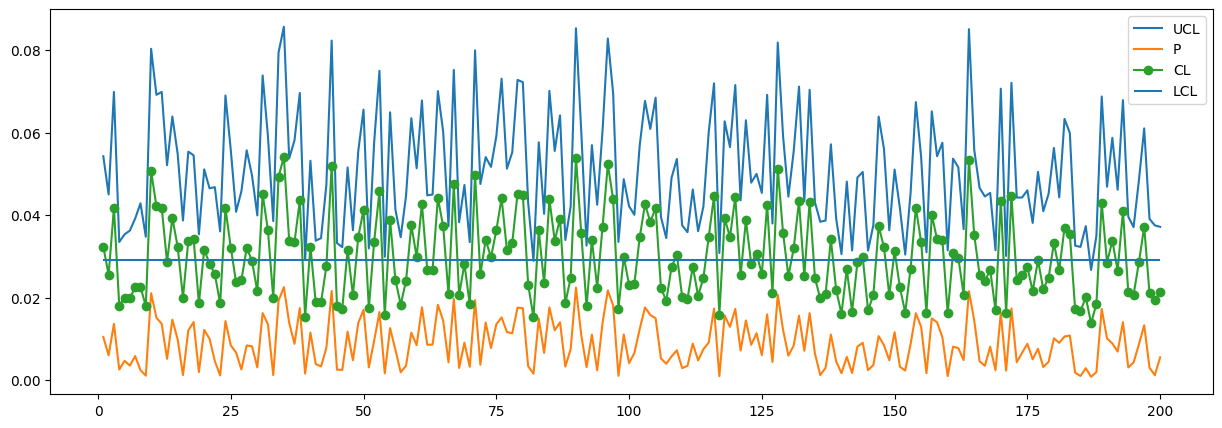

In [92]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/refs/heads/main/data/lot_quality.csv')
df.head()

# p 관리 구하는 방법
# n = lot 별 생산 수량
# p = lot 별 불량 수량
# CL = 전체 불량 수량 / 전체 생산 수량

# lot 인덱스
df2 = df.set_index('lot')

# 불량 / 생산
df2['p'] =  df2['불량수량']/ df2['생산수량']

# UCL
df2['UCL'] = df2['p'] + (3 * (df2['p'] * ( 1 - df2['p']) / df2['생산수량']) ** 0.5)
df2['LCL'] = df2['p'] - (3 * (df2['p'] * ( 1 - df2['p']) / df2['생산수량']) ** 0.5)


# 관리 중심선
CL = df2['불량수량'].sum() / df2['생산수량'].sum()
print(CL)


# 시각화
plt.figure(figsize = (15,5))
plt.plot(df2['UCL'])
plt.plot(df2['LCL'])
plt.plot(df2['p'], marker = 'o')
plt.hlines(CL, 1, 200)
plt.legend(['UCL','P','CL','LCL'])

✅ 문제 6
* 4.상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 함.
* 4.1 구매하는 패턴으로 봐서 두 상품이 연관이 있는지 가설 세우고 검정하시오
* 4.2 연구가설 귀무가설 세우시오
* 4.3 가설 채택하시오

In [98]:
from statsmodels.sandbox.stats.runs  import runstest_1samp

data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']

df = pd.DataFrame(data, columns = ['value'])

# 가설 검정
# 귀무 : 관측값이 임의적이다 = 연관성이 없다
# 대립 : 곽측값이 임의적이 아니다 - 연관성이 있다.


df['value'] = df['value'].apply(lambda x : 1 if x == 'a' else 0)

z_stat, p_val = runstest_1samp(df)

if p_val < 0.05 :
  print("귀무가설 기각 : 연관성이 있다")
else :
  print("귀무가설 채택 : 연관성이 없다")

귀무가설 채택 : 연관성이 없다
